# Sequential Gaussian simulation (conditional)


>**Note:** This notebook is inspired from the notebook [ex_geosclassic_2d.ipynb](https://github.com/randlab/geone/blob/master/examples/ex_geosclassic_2d.ipynb) by Julien Straubhaar.

We can use the same settings of the script [00_unconditional_SGS.ipynb](00_unconditional_SGS.ipynb) to perform some **conditional** simulations when some conditioning data are available.  

For the sake of brievity, here the text explanation which were aready covered in the previous notebook are omitted.

In [1]:
import numpy as np
import matplotlib.pyplot as pl
import time

# import package 'geone'
import geone as gn

Definition of a variogram model:

In [2]:
cov_model = gn.covModel.CovModel2D(elem=[
    ('spherical', {'w':5., 'r':[150,150]}), # elementary contribution
    ('nugget', {'w':0.0})                    # elementary contribution
    ], name='model-2D')

Grid definition

In [3]:
nx, ny = 220, 230  # number of cells
dx, dy = 1.0, 1.0  # cell unit
ox, oy = 0.0, 0.0  # origin

dimension = (nx, ny)
spacing = (dx, dy)
origin = (ox, oy)

## Conditioning data

The main difference from the notebook `00_uncoditional_SGS.npynb` is the following: some conditioning values of the variable $v$ are defined at some $\mathbf{x}=(x_1,x_2)$ locations in the 2D space.

Note that in the past we often loaded these data (that were also used to compute an experimental variogram) from an extenal file.  
Here for simplicity we define them directly into the notebook. They are simply four points:

In [4]:
x = np.array([[ 10.,  20.], # 1st point
              [ 50.,  40.], # 2nd point
              [ 20., 150.], # 3rd point
              [200., 210.]]) # 4th point
v = [ -3.,  2.,   5.,  -1.] # values

## SGS simulation

Here the only difference from an unconditional simulation are the terms `x=x, v=v`.

In [5]:
nreal = 10
np.random.seed(321)
geosclassic_output = gn.geosclassicinterface.simulate2D(cov_model, dimension, spacing, origin, 
                                                        method='ordinary_kriging',
                                                        x=x, v=v, 
                                                        searchRadiusRelative=3.0, nneighborMax=12,
                                                        nreal=nreal, nthreads=1)

Geos-Classic running... [VERSION 2.0 / BUILD NUMBER 20230914 / OpenMP 1 thread(s)]
Geos-Classic run complete


Retrieve the results

In [6]:
# Retrieve the realxy_sam = np.stack((x_sam, y_sam), axis=-1)izations
simul = geosclassic_output['image']

On the output, you can compute some mean values, or a standard deviation, pixel wise.

In [7]:
# Compute mean and standard deviation (pixel-wise)
simul_mean = gn.img.imageContStat(simul, op='mean')
simul_std = gn.img.imageContStat(simul, op='std')

Plot some realizations

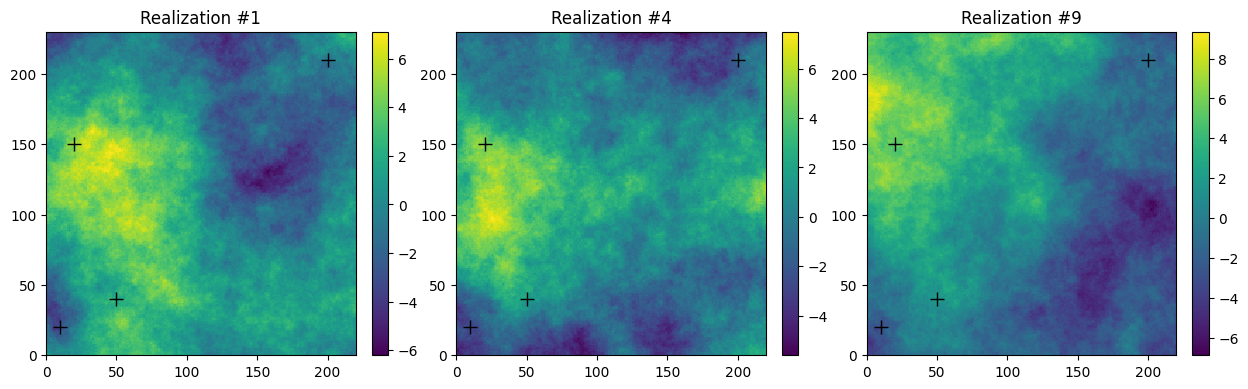

In [8]:
pl.subplots(1,3,figsize=((15,5)))
pl.subplot(1,3,1)
pl.title("Realization #1")
gn.imgplot.drawImage2D(simul, iv=1)
pl.plot(x[:,0],x[:,1], '+', c='black', markersize=10) # add conditioning point locations
pl.subplot(1,3,2)
pl.title("Realization #4")
gn.imgplot.drawImage2D(simul, iv=4)
pl.plot(x[:,0],x[:,1], '+', c='black', markersize=10) # add conditioning point locations
pl.subplot(1,3,3)
pl.title("Realization #9")
gn.imgplot.drawImage2D(simul, iv=9)
pl.plot(x[:,0],x[:,1], '+', c='black', markersize=10) # add conditioning point locations

## Mean value and standard deviation

You can also plot the mean value and standard deviation over many realizations.

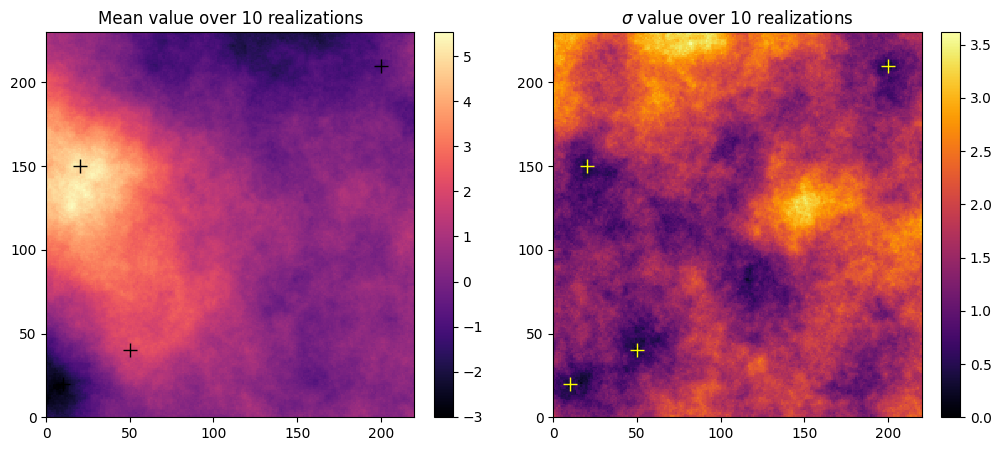

In [9]:
pl.subplots(1,2,figsize=((12,5)))
pl.subplot(1,2,1)
pl.title("Mean value over {0} realizations".format(nreal))
gn.imgplot.drawImage2D(simul_mean, cmap="magma")
pl.plot(x[:,0],x[:,1], '+', c='black', markersize=10) # add conditioning point locationspl.subplot(1,2,1)
pl.subplot(1,2,2)
pl.title("$\sigma$ value over {0} realizations".format(nreal))
gn.imgplot.drawImage2D(simul_std, cmap="inferno")
pl.plot(x[:,0],x[:,1], '+', c='yellow', markersize=10) # add conditioning point locations


The effect of the conditioning points can be easily seen into the mean (and standard deviation maps).

## Ordinary Kriging

We can also check the results obtained with the same conditioning points and the same variogram by using ordinary Kriging

In [11]:
krige_out = gn.geosclassicinterface.estimate2D(cov_model, dimension, spacing, origin, 
                                                        x=x, v=v, method='ordinary_kriging',
                                                        searchRadiusRelative=2.0)

Geos-Classic running... [VERSION 2.0 / BUILD NUMBER 20230914 / OpenMP 11 thread(s)]
Geos-Classic run complete


Retrieve the output

In [12]:
krige = krige_out["image"]

Text(0.5, 1.0, 'Kriging standard deviation')

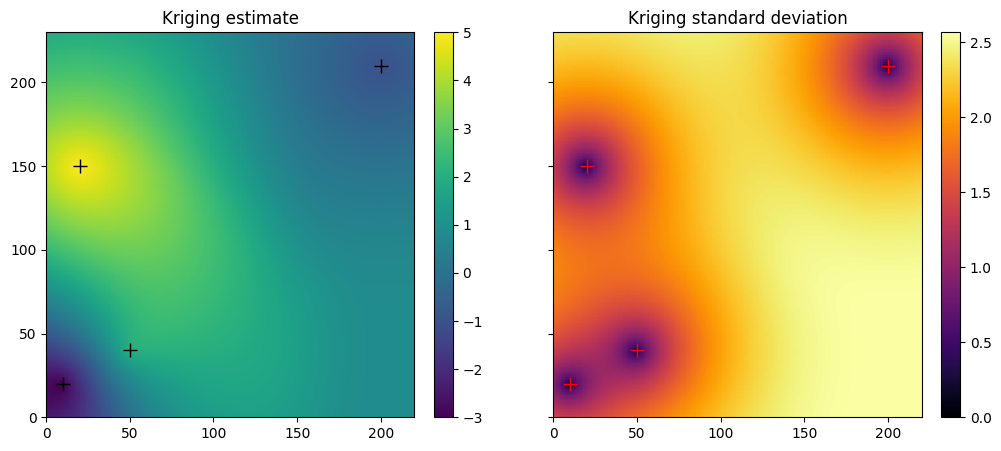

In [16]:
pl.subplots(1, 2, figsize=(12,5), sharey=True)

# kriging estimates
pl.subplot(1, 2, 1)
gn.imgplot.drawImage2D(krige, iv=0, cmap="viridis")
pl.plot(x[:,0],x[:,1], '+', c='black', markersize=10) # add conditioning point locations
pl.title('Kriging estimate')

# kriging standard deviation
pl.subplot(1, 2, 2)
gn.imgplot.drawImage2D(krige, iv=1, cmap='inferno')
pl.plot(x[:,0],x[:,1], '+', c='red', markersize=10) # add conditioning point locations
pl.title('Kriging standard deviation')